# Reste à faire 
1. Faire le graphique map avec le 'from'
2. DRY les étapes redondantes : créer des définitions ou des boucles
3. Nommer explicitements des variables
4. Retravailler les titres étapes
5. Mettre un commentaire après chaque graphique
6. Faire la conclusion de cette étape


### PART 0 : Candidate' profiling

In [80]:
# Loading librairie needed
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.io as pio


from math import pi

# Display all columns in the .head()
pd.options.display.max_columns = 1000 

# To hide warning log
import warnings
warnings.filterwarnings('ignore')

In [82]:
# Loading dataset
dataset = pd.read_csv('src/Speed_Dating_Data.csv', encoding='ISO-8859-1')

In [83]:
# Visualize the 5 first rows
dataset.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

In [84]:
# Checking the initial shape of the dataset
dataset.shape

(8378, 195)

In [85]:
# Getting all the columns names
dataset.columns.to_list()

['iid',
 'id',
 'gender',
 'idg',
 'condtn',
 'wave',
 'round',
 'position',
 'positin1',
 'order',
 'partner',
 'pid',
 'match',
 'int_corr',
 'samerace',
 'age_o',
 'race_o',
 'pf_o_att',
 'pf_o_sin',
 'pf_o_int',
 'pf_o_fun',
 'pf_o_amb',
 'pf_o_sha',
 'dec_o',
 'attr_o',
 'sinc_o',
 'intel_o',
 'fun_o',
 'amb_o',
 'shar_o',
 'like_o',
 'prob_o',
 'met_o',
 'age',
 'field',
 'field_cd',
 'undergra',
 'mn_sat',
 'tuition',
 'race',
 'imprace',
 'imprelig',
 'from',
 'zipcode',
 'income',
 'goal',
 'date',
 'go_out',
 'career',
 'career_c',
 'sports',
 'tvsports',
 'exercise',
 'dining',
 'museums',
 'art',
 'hiking',
 'gaming',
 'clubbing',
 'reading',
 'tv',
 'theater',
 'movies',
 'concerts',
 'music',
 'shopping',
 'yoga',
 'exphappy',
 'expnum',
 'attr1_1',
 'sinc1_1',
 'intel1_1',
 'fun1_1',
 'amb1_1',
 'shar1_1',
 'attr4_1',
 'sinc4_1',
 'intel4_1',
 'fun4_1',
 'amb4_1',
 'shar4_1',
 'attr2_1',
 'sinc2_1',
 'intel2_1',
 'fun2_1',
 'amb2_1',
 'shar2_1',
 'attr3_1',
 'sinc3_1',
 

CREATION OF A DATAFRAME TO KNOW THE PROFIL OF THE 552 CANDIDATES

In [87]:
# Creating a list of usefull columns for this analysis
usefull_col =['iid',
            'id',
            'gender',
            'condtn',
            'age',
            'imprace',
            'imprelig',
            'from',
            'goal',
            'date',
            'go_out',
            'exphappy',
            'expnum',
            'match_es',
            'attr1_s',
            'sinc1_s',
            'intel1_s',
            'fun1_s',
            'amb1_s',
            'shar1_s',
            'attr3_s',
            'sinc3_s',
            'intel3_s',
            'fun3_s',
            'amb3_s',
            'satis_2',
            'length',
            'numdat_2']

In [88]:
# Creating a dataframe with only usefull_col
df = pd.DataFrame(data=dataset, columns=usefull_col)

In [89]:
# Checking the shape
df.shape

(8378, 28)

MISSING VALUES MANAGEMENT

In [90]:
# Checking the missing values
df.isna().sum(axis=1)

0       11
1       11
2       11
3       11
4       11
        ..
8373    12
8374    12
8375    12
8376    12
8377    13
Length: 8378, dtype: int64

In [91]:
# Groupby idd to get one row for 1 people with minimum of NaN values
df = df.loc[df.isnull().sum(axis=1).groupby(df.iid).idxmin(),:]


In [92]:
# Checking the shape
df.shape

(551, 28)

In [93]:
# Checking missing values
df.isnull().sum()

iid           0
id            0
gender        0
condtn        0
age           8
imprace       7
imprelig      7
from          7
goal          7
date          8
go_out        7
exphappy      8
expnum      425
match_es     72
attr1_s     270
sinc1_s     270
intel1_s    270
fun1_s      270
amb1_s      270
shar1_s     270
attr3_s     275
sinc3_s     275
intel3_s    275
fun3_s      275
amb3_s      275
satis_2      66
length       66
numdat_2     69
dtype: int64

Refill the missing values

In [94]:
age_mean=df["age"].mean()
df["age"].fillna(value=age_mean, inplace=True)

In [95]:
imprace=df["imprace"].mean()
df["imprace"].fillna(value=imprace, inplace=True)

In [96]:
imprelig=df["imprelig"].mean()
df["imprelig"].fillna(value=imprelig, inplace=True)

In [97]:
df["from"].value_counts()
df["from"].fillna(value=1, inplace=True)

In [98]:
df["goal"].value_counts()
df["goal"].fillna(value=1 , inplace=True)

In [99]:
df["date"].value_counts()
df["date"].fillna(value=6 , inplace=True)

In [100]:
df["date"].fillna(value=6 , inplace=True)

In [101]:
df["go_out"].value_counts()
df["go_out"].fillna(value=2 , inplace=True)

In [102]:
exphappy=df["exphappy"].mean()
df["exphappy"].fillna(value=exphappy, inplace=True)

In [103]:
expnum=df["expnum"].mean()
df["expnum"].fillna(value=expnum, inplace=True)

In [104]:
match_es=df["match_es"].mean()
df["match_es"].fillna(value=match_es, inplace=True)

In [105]:
attr1_s=df["attr1_s"].mean()
df["attr1_s"].fillna(value=attr1_s, inplace=True)

In [106]:
sinc1_s=df["sinc1_s"].mean()
df["sinc1_s"].fillna(value=sinc1_s, inplace=True)

In [107]:
intel1_s=df["intel1_s"].mean()
df["intel1_s"].fillna(value=intel1_s, inplace=True)

In [108]:
fun1_s=df["fun1_s"].mean()
df["fun1_s"].fillna(value=fun1_s, inplace=True)

In [109]:
amb1_s=df["amb1_s"].mean()
df["amb1_s"].fillna(value=amb1_s, inplace=True)

In [110]:
shar1_s=df["shar1_s"].mean()
df["shar1_s"].fillna(value=shar1_s, inplace=True)

In [111]:
attr3_s=df["attr3_s"].mean()
df["attr3_s"].fillna(value=attr3_s, inplace=True)

In [112]:
sinc3_s=df["sinc3_s"].mean()
df["sinc3_s"].fillna(value=sinc3_s, inplace=True)

In [113]:
intel3_s=df["intel3_s"].mean()
df["intel3_s"].fillna(value=intel3_s, inplace=True)

In [114]:
fun3_s=df["fun3_s"].mean()
df["fun3_s"].fillna(value=fun3_s, inplace=True)

In [115]:
amb3_s=df["amb3_s"].mean()
df["amb3_s"].fillna(value=amb3_s, inplace=True)

In [116]:
satis_2=df["satis_2"].mean()
df["satis_2"].fillna(value=satis_2, inplace=True)

In [117]:
length=df["length"].mean()
df["length"].fillna(value=length, inplace=True)

In [118]:
numdat_2=df["numdat_2"].mean()
df["numdat_2"].fillna(value=numdat_2, inplace=True)

In [119]:
df.isnull().sum()

iid         0
id          0
gender      0
condtn      0
age         0
imprace     0
imprelig    0
from        0
goal        0
date        0
go_out      0
exphappy    0
expnum      0
match_es    0
attr1_s     0
sinc1_s     0
intel1_s    0
fun1_s      0
amb1_s      0
shar1_s     0
attr3_s     0
sinc3_s     0
intel3_s    0
fun3_s      0
amb3_s      0
satis_2     0
length      0
numdat_2    0
dtype: int64

REMPLACEMENT DES NUMERO PAR LE TEXTE ASSOSCIE

In [120]:
df.head()

,iid,id,gender,condtn,age,imprace,imprelig,from,goal,date,go_out,exphappy,expnum,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2
0,1,1.0,0,1,21.0,2.0,4.0,Chicago,2.0,7.0,1.0,3.0,2.0,4.000000,20.127722,15.190996,16.722669,14.865658,10.79573,11.963381,7.20471,8.103261,8.230072,7.706522,7.568841,6.000000,2.000000,1.000000
10,2,2.0,0,1,24.0,2.0,5.0,Alabama,1.0,5.0,1.0,4.0,5.0,3.000000,20.127722,15.190996,16.722669,14.865658,10.79573,11.963381,7.20471,8.103261,8.230072,7.706522,7.568841,5.000000,2.000000,2.311203
20,3,3.0,0,1,25.0,8.0,4.0,Connecticut,6.0,3.0,1.0,4.0,2.0,3.026931,20.127722,15.190996,16.722669,14.865658,10.79573,11.963381,7.20471,8.103261,8.230072,7.706522,7.568841,5.676289,1.861856,2.311203
30,4,4.0,0,1,23.0,1.0,1.0,Texas,1.0,5.0,1.0,1.0,2.0,2.000000,20.127722,15.190996,16.722669,14.865658,10.79573,11.963381,7.20471,8.103261,8.230072,7.706522,7.568841,4.000000,3.000000,2.000000
40,5,5.0,0,1,21.0,8.0,1.0,Bowdoin College,2.0,4.0,1.0,7.0,10.0,3.026931,20.127722,15.190996,16.722669,14.865658,10.79573,11.963381,7.20471,8.103261,8.230072,7.706522,7.568841,7.000000,2.000000,2.000000


In [121]:
df["gender"] = df["gender"].apply(lambda x : "Male" if x==1 else "Female")

In [122]:
df["condtn"] = df["condtn"].apply(lambda x : "limited_choice" if x==1 else "extensive_choice")

In [123]:
df["goal"] = df["goal"].apply(lambda x : "Seemed like a fun night out" if x ==1 
                                    else("To meet new people" if x ==2 
                                    else( "To get a date" if x == 3 
                                    else("Looking for a serious relationship" if x==4 
                                    else("To say I did it" if x ==5 
                                    else "Other"
                                            )))))


In [124]:
df["date"] = df["date"].apply(lambda x : "Several times a week" if x ==1 
                                    else("Twice a week" if x ==2 
                                    else("Once a week" if x == 3 
                                    else("Twice a month" if x==4 
                                    else("Once a month" if x ==5 
                                    else("Several times a year" if x ==5
                                    else "Almost never"
                                            ))))))

In [125]:
df["go_out"] = df["go_out"].apply(lambda x : "Several times a week" if x ==1 
                                    else("Twice a week" if x ==2 
                                    else("Once a week" if x == 3 
                                    else("Twice a month" if x==4 
                                    else("Once a month" if x ==5 
                                    else("Several times a year" if x ==5
                                    else "Almost never"
                                            ))))))

In [126]:
df["length"] = df["length"].apply(lambda x : "Too litlle" if x ==1 
                                    else("Too much" if x ==2 
                                    else "Just Right"
                                            ))

In [127]:
df["numdat_2"] = df["numdat_2"].apply(lambda x : "Too few" if x ==1 
                                    else("Too many" if x ==2 
                                    else "Just Right"
                                            ))

DATA VISUALIZATION ANALYSIS

In [128]:
df.head()

,iid,id,gender,condtn,age,imprace,imprelig,from,goal,date,go_out,exphappy,expnum,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2
0,1,1.0,Female,limited_choice,21.0,2.0,4.0,Chicago,To meet new people,Almost never,Several times a week,3.0,2.0,4.000000,20.127722,15.190996,16.722669,14.865658,10.79573,11.963381,7.20471,8.103261,8.230072,7.706522,7.568841,6.000000,Too much,Too few
10,2,2.0,Female,limited_choice,24.0,2.0,5.0,Alabama,Seemed like a fun night out,Once a month,Several times a week,4.0,5.0,3.000000,20.127722,15.190996,16.722669,14.865658,10.79573,11.963381,7.20471,8.103261,8.230072,7.706522,7.568841,5.000000,Too much,Just Right
20,3,3.0,Female,limited_choice,25.0,8.0,4.0,Connecticut,Other,Once a week,Several times a week,4.0,2.0,3.026931,20.127722,15.190996,16.722669,14.865658,10.79573,11.963381,7.20471,8.103261,8.230072,7.706522,7.568841,5.676289,Just Right,Just Right
30,4,4.0,Female,limited_choice,23.0,1.0,1.0,Texas,Seemed like a fun night out,Once a month,Several times a week,1.0,2.0,2.000000,20.127722,15.190996,16.722669,14.865658,10.79573,11.963381,7.20471,8.103261,8.230072,7.706522,7.568841,4.000000,Just Right,Too many
40,5,5.0,Female,limited_choice,21.0,8.0,1.0,Bowdoin College,To meet new people,Twice a month,Several times a week,7.0,10.0,3.026931,20.127722,15.190996,16.722669,14.865658,10.79573,11.963381,7.20471,8.103261,8.230072,7.706522,7.568841,7.000000,Too much,Too many


In [129]:
df.shape

(551, 28)

Text(0.5, 1.0, 'Gender repartition')

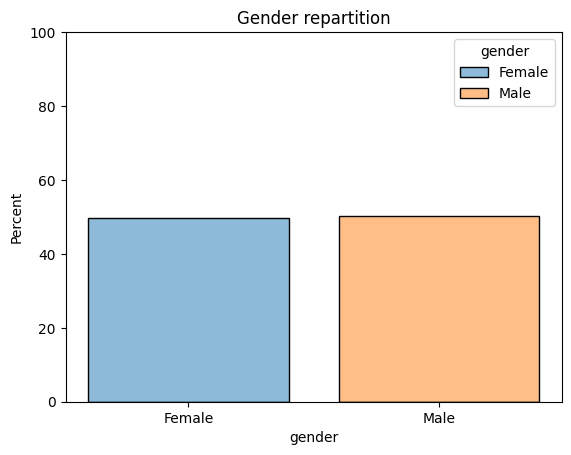

In [130]:
ax = sns.histplot(data = df, x = 'gender', stat= "percent", shrink = 0.8, hue='gender')
ax.set_ylim(0,100)
ax.set_title("Gender repartition")

Text(0.5, 1.0, 'Choice repartition')

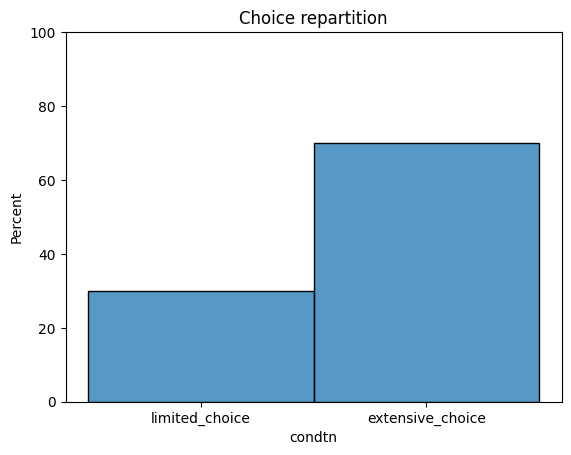

In [148]:
ax1 = sns.histplot(data = df, x = "condtn", stat = 'percent')
ax1.set_ylim(0,100)
ax1.set_title("Choice repartition")

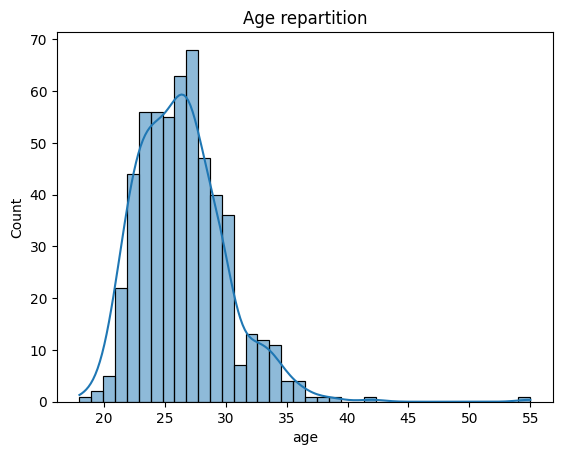

In [144]:
ax2=sns.histplot(data = df, x = "age", kde=True)
ax2.set_title("Age repartition");

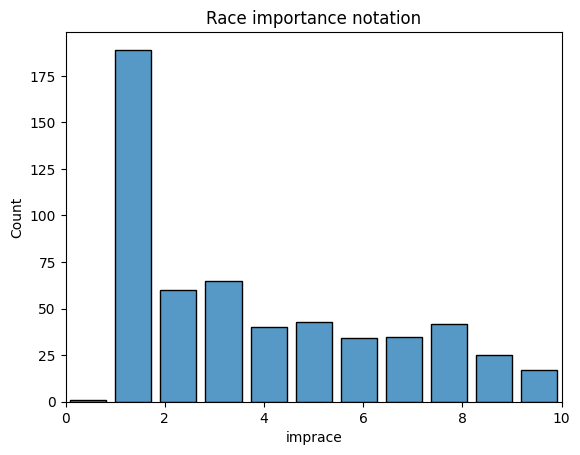

In [133]:
ax3 = sns.countplot(data = df, x = "imprace", shrink = 0.8)
ax3.set_title("Race importance notation")
ax3.set_xlim(0,10);

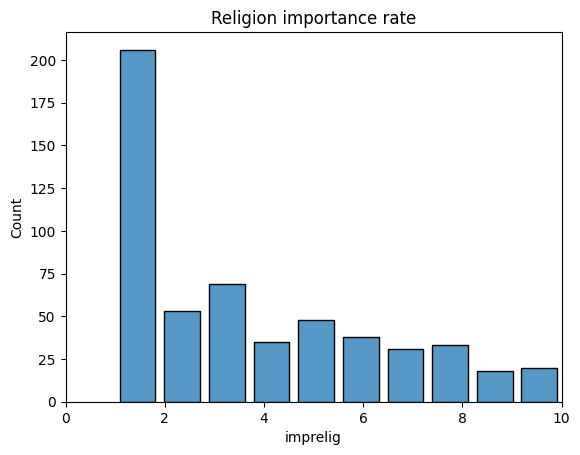

In [151]:
ax4 = sns.histplot(data = df, x= "imprelig", shrink = 0.8, bins=10 )
ax4.set_xlim(0,10)
ax4.set_title("Religion importance rate");

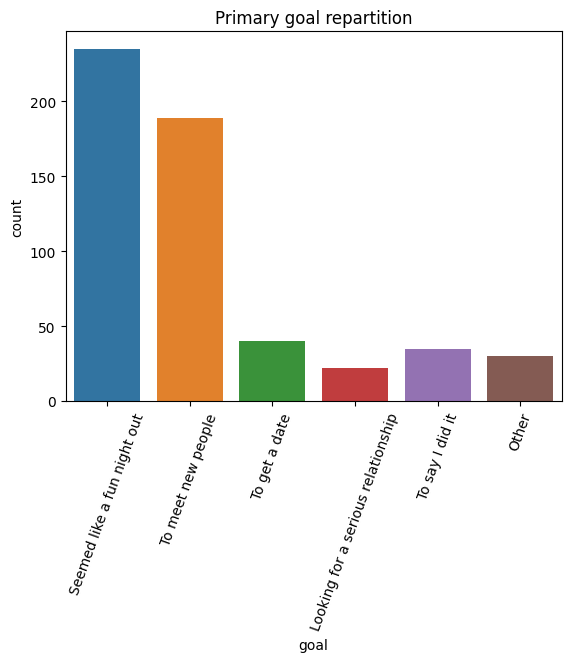

In [135]:
ax5 = sns.countplot(data = df, x = 'goal', order= ["Seemed like a fun night out",
                                                    "To meet new people", 
                                                    "To get a date",
                                                    "Looking for a serious relationship",
                                                    "To say I did it",
                                                    "Other"] )                           
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=70)
ax5.set_title("Primary goal repartition");

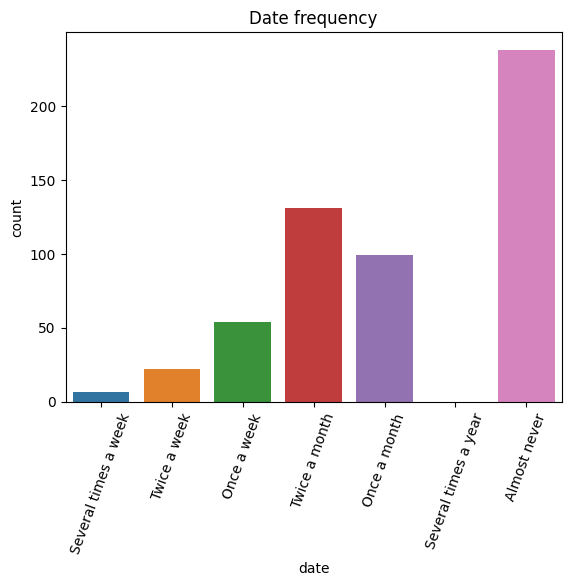

In [136]:
ax6 = sns.countplot(data = df, x = "date", order= ["Several times a week", 
                                                    "Twice a week",
                                                    "Once a week",
                                                    "Twice a month", 
                                                    "Once a month", 
                                                    "Several times a year", 
                                                    "Almost never"])                               
ax6.set_xticklabels(ax6.get_xticklabels(), rotation=70);
ax6.set_title("Date frequency");

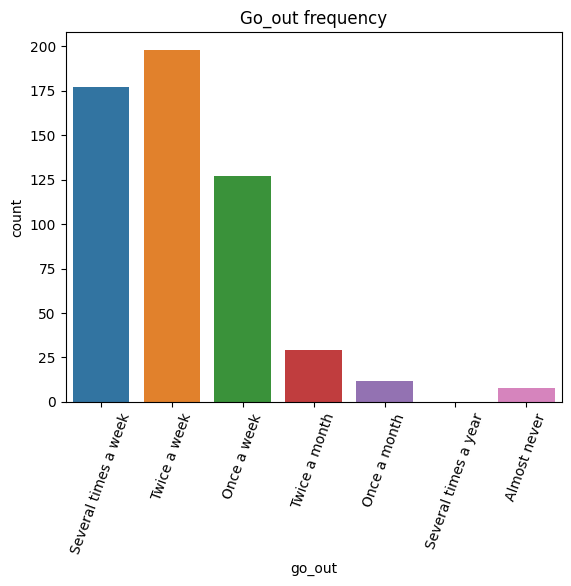

In [137]:
ax7 = sns.countplot(data = df, x = "go_out", order= ["Several times a week", 
                                                    "Twice a week",
                                                    "Once a week",
                                                    "Twice a month", 
                                                    "Once a month", 
                                                    "Several times a year", 
                                                    "Almost never"])                               
ax7.set_xticklabels(ax7.get_xticklabels(), rotation=70);
ax7.set_title("Go_out frequency");

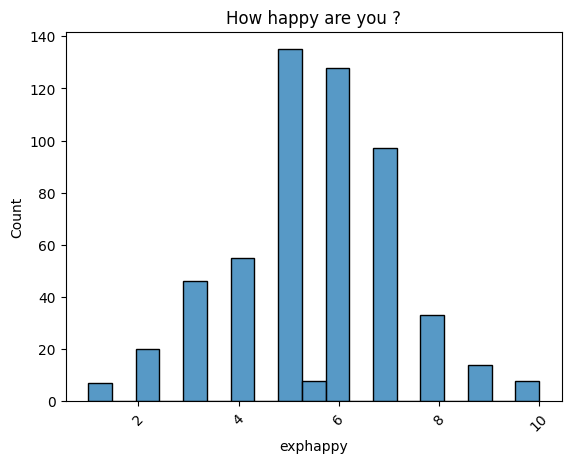

In [138]:
ax8 = sns.countplot(data = df, x = 'exphappy')
ax8.set_xticklabels(ax8.get_xticklabels(), rotation=45);
ax8.set_title("How happy are you ?");

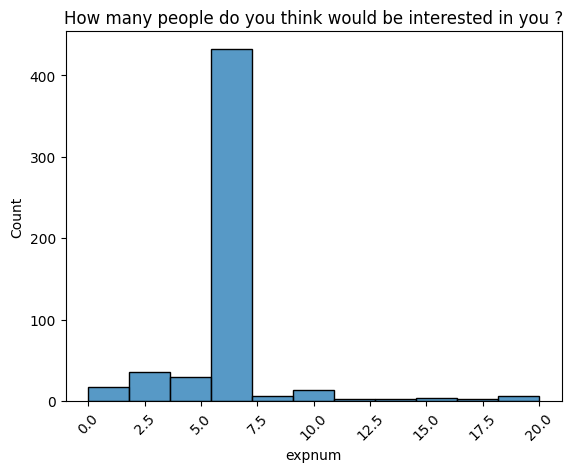

In [139]:
ax9 = sns.countplot(data = df, x = 'expnum')
ax9.set_xticklabels(ax9.get_xticklabels(), rotation=45)
ax9.set_title("How many people do you think would be interested in you ?");

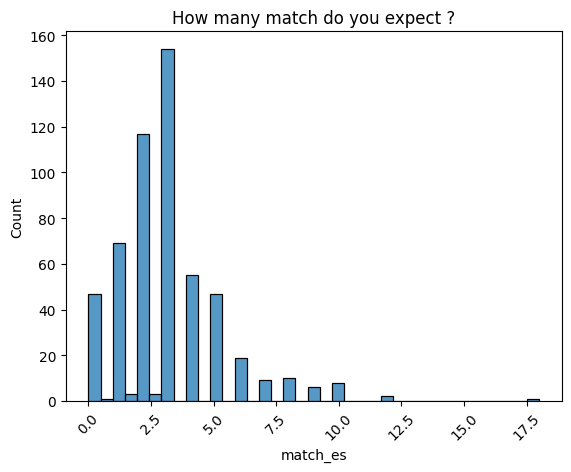

In [140]:
ax10 = sns.countplot(data = df, x = 'match_es')
ax10.set_xticklabels(ax10.get_xticklabels(), rotation=45)
ax10.set_title("How many match do you expect ?");

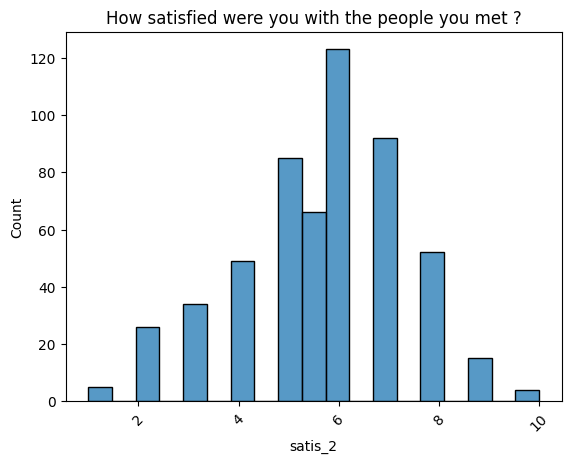

In [152]:
ax11 = sns.histplot(data = df, x = 'satis_2')                                                              # NOTE_ REVOIR LES DONNES NORMALEMENT NOTATION
ax11.set_xticklabels(ax11.get_xticklabels(), rotation=45)
ax11.set_title("How satisfied were you with the people you met ?");

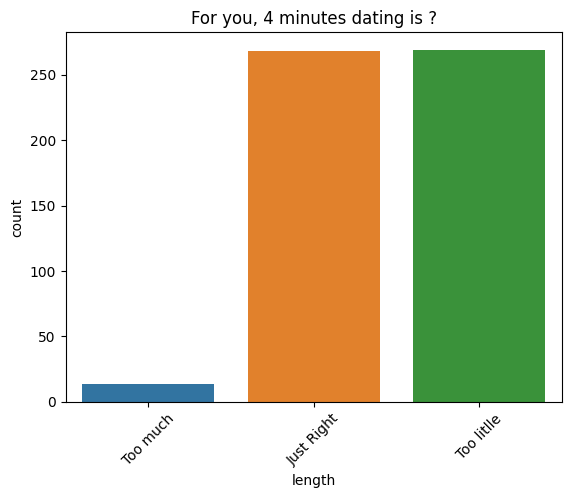

In [78]:
ax12 = sns.countplot(data = df, x = 'length')
ax12.set_xticklabels(ax12.get_xticklabels(), rotation=45)
ax12.set_title("For you, 4 minutes dating is ?");

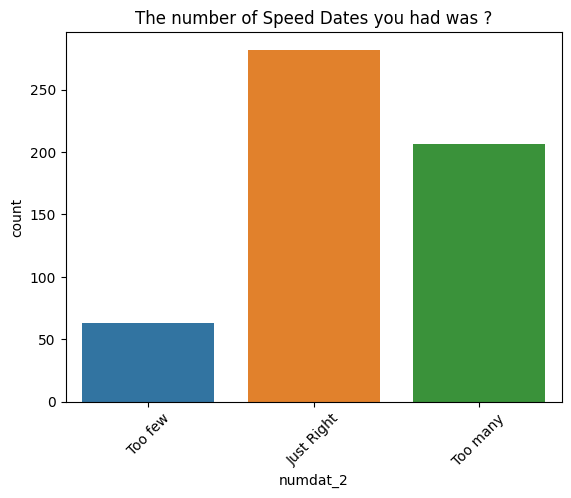

In [79]:
ax13 = sns.countplot(data = df, x = 'numdat_2')
ax13.set_xticklabels(ax13.get_xticklabels(), rotation=45)
ax13.set_title("The number of Speed Dates you had was ?");

SPIDER VISUALISATION Female VS Male

In [153]:
# Splitting df by gender Female and Male
df.head()

,iid,id,gender,condtn,age,imprace,imprelig,from,goal,date,go_out,exphappy,expnum,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2
0,1,1.0,Female,limited_choice,21.0,2.0,4.0,Chicago,To meet new people,Almost never,Several times a week,3.0,2.0,4.000000,20.127722,15.190996,16.722669,14.865658,10.79573,11.963381,7.20471,8.103261,8.230072,7.706522,7.568841,6.000000,Too much,Too few
10,2,2.0,Female,limited_choice,24.0,2.0,5.0,Alabama,Seemed like a fun night out,Once a month,Several times a week,4.0,5.0,3.000000,20.127722,15.190996,16.722669,14.865658,10.79573,11.963381,7.20471,8.103261,8.230072,7.706522,7.568841,5.000000,Too much,Just Right
20,3,3.0,Female,limited_choice,25.0,8.0,4.0,Connecticut,Other,Once a week,Several times a week,4.0,2.0,3.026931,20.127722,15.190996,16.722669,14.865658,10.79573,11.963381,7.20471,8.103261,8.230072,7.706522,7.568841,5.676289,Just Right,Just Right
30,4,4.0,Female,limited_choice,23.0,1.0,1.0,Texas,Seemed like a fun night out,Once a month,Several times a week,1.0,2.0,2.000000,20.127722,15.190996,16.722669,14.865658,10.79573,11.963381,7.20471,8.103261,8.230072,7.706522,7.568841,4.000000,Just Right,Too many
40,5,5.0,Female,limited_choice,21.0,8.0,1.0,Bowdoin College,To meet new people,Twice a month,Several times a week,7.0,10.0,3.026931,20.127722,15.190996,16.722669,14.865658,10.79573,11.963381,7.20471,8.103261,8.230072,7.706522,7.568841,7.000000,Too much,Too many


In [154]:
mask_f = df['gender'] == "Female"

In [155]:
df_f = df.loc[mask_f,:]

In [156]:
df_f.shape

(274, 28)

In [157]:
mask_m = df['gender'] == "Male"

In [158]:
df_m = df.loc[mask_m,:]

In [159]:
df_m.shape

(277, 28)

Importance rate in a potential date Female

In [160]:
columns1_s = ['attr1_s',
            'sinc1_s',
            'intel1_s',
            'fun1_s',
            'amb1_s',
            'shar1_s']

In [161]:
mean_list_imp_f = []
for item in columns1_s:
    mean = df_f[item].mean()
    mean_list_imp_f.append(mean)

In [162]:
dic_imp_f = {'attr1_s': [mean_list_imp_f[0]], 
                'sinc1_s': [mean_list_imp_f[1]],
                'intel1_s': [mean_list_imp_f[2]],
                'fun1_s': [mean_list_imp_f[3]],
                'amb1_s': [mean_list_imp_f[4]],
                'shar1_s': [mean_list_imp_f[5]],
        }

In [163]:
df_imp_f = pd.DataFrame(data = dic_imp_f)

In [164]:
df_imp_f

,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s
0,18.411262,15.552254,17.027293,14.798178,11.490039,12.527615


In [165]:
categories = ['Attractive', 'Sincere', 'Intelligent', 'Fun', 'Ambitious', 'Share Interests']
categories = [*categories, categories[0]]

mean_attribute = mean_list_imp_f
mean_attribute = [*mean_attribute, mean_attribute[0]]



fig = go.Figure(
    data=[
        go.Scatterpolar(r=mean_attribute, theta=categories, fill='toself', name='mean_attribute'),

    ],
    layout=go.Layout(
        title=go.layout.Title(text='Female Importance of attributes in a potential date'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

pyo.plot(fig);


Importance rate in a potential date Male

In [166]:
mean_list_imp_m = []
for item in columns1_s:
    mean = df_m[item].mean()
    mean_list_imp_m.append(mean)

dic_imp_m = {'attr1_s': [mean_list_imp_m[0]], 
                'sinc1_s': [mean_list_imp_m[1]],
                'intel1_s': [mean_list_imp_m[2]],
                'fun1_s': [mean_list_imp_m[3]],
                'amb1_s': [mean_list_imp_m[4]],
                'shar1_s': [mean_list_imp_m[5]],
        }

df_imp_m = pd.DataFrame(data = dic_imp_m)

categories = ['Attractive', 'Sincere', 'Intelligent', 'Fun', 'Ambitious', 'Share Interests']
categories = [*categories, categories[0]]

mean_attribute = mean_list_imp_m
mean_attribute = [*mean_attribute, mean_attribute[0]]

fig = go.Figure(
    data=[
        go.Scatterpolar(r=mean_attribute, theta=categories, fill='toself', name='mean_attribute'),

    ],
    layout=go.Layout(
        title=go.layout.Title(text='Male Importance of attributes in a potential date'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

pyo.plot(fig);

Female rate opinion of your own attributes

In [167]:
columns3_s = ['attr3_s',
            'sinc3_s',
            'intel3_s',
            'fun3_s',
            'amb3_s']

In [168]:
mean_list_r_f = []
for item in columns3_s:
    mean = df_f[item].mean()
    mean_list_r_f.append(mean)

In [169]:
dic_r_f = {'attr3_s': [mean_list_r_f[0]], 
        'sinc3_s': [mean_list_r_f[1]],
        'intel3_s': [mean_list_r_f[2]],
        'fun3_s': [mean_list_r_f[3]],
        'amb3_s': [mean_list_r_f[4]]
        }

In [170]:
df_r_f = pd.DataFrame(data = dic_r_f)

In [171]:
df_r_f

,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s
0,7.318517,8.187103,8.171169,7.832236,7.556001


In [177]:
categories = ['Attractive', 'Sincere', 'Intelligent', 'Fun', 'Ambitious']
categories = [*categories, categories[0]]

mean_attribute = mean_list_r_f

mean_attribute = [*mean_attribute, mean_attribute[0]]



fig = go.Figure(
    data=[
        go.Scatterpolar(r=mean_attribute, theta=categories, fill='toself', name='mean_attribute'),

    ],
    layout=go.Layout(
        title=go.layout.Title(text='Female rate opinion of attribute'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

pyo.plot(fig);


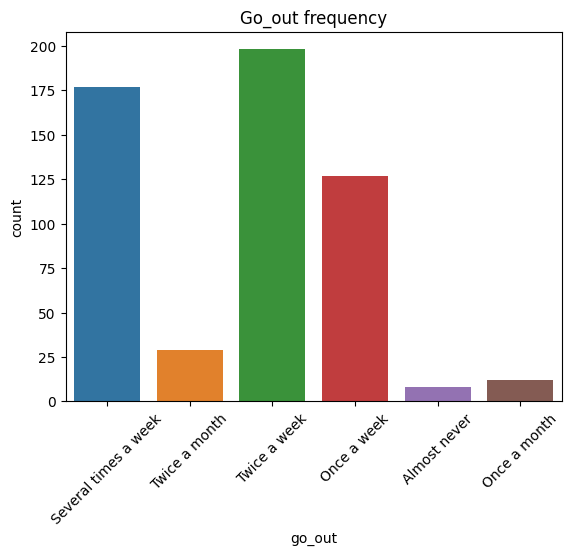

In [ ]:
ax7 = sns.countplot(data = df, x = 'go_out')                                             ## NOTE_ : Sort values
ax7.set_xticklabels(ax7.get_xticklabels(), rotation=45);
ax7.set_title("Go_out frequency");

SyntaxError: invalid syntax (3984016679.py, line 1)

In [175]:
mean_list_r_m = []
for item in columns3_s:
    mean = df_m[item].mean()
    mean_list_r_m.append(mean)

dic_r_m = {'attr3_s': [mean_list_r_m[0]], 
    'sinc3_s': [mean_list_r_m[1]],
    'intel3_s': [mean_list_r_m[2]],
    'fun3_s': [mean_list_r_m[3]],
    'amb3_s': [mean_list_r_m[4]]
    }

df_r_m = pd.DataFrame(data = dic_r_m)

categories = ['Attractive', 'Sincere', 'Intelligent', 'Fun', 'Ambitious']
categories = [*categories, categories[0]]

mean_attribute = mean_list_r_m

mean_attribute = [*mean_attribute, mean_attribute[0]]



fig = go.Figure(
    data=[
        go.Scatterpolar(r=mean_attribute, theta=categories, fill='toself', name='mean_attribute'),

    ],
    layout=go.Layout(
        title=go.layout.Title(text='Male rate opinion of attribute'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

pyo.plot(fig);

Conclusion